<html> <img style="float:center; margin: 0px 0px 0px 0px;" src="https://docs.google.com/uc? export=download&id=1jIxUCriI-tyCAkUYHz05rk5SY_rTHRV9" width="220" align="left"/> </html> 

<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1BmLEthy7KCNsnVFviFKX77zLmFhc47XZ' align='right'width="220"/>
    
<figcaption>

</figcaption></center>
</figure>
<center> <H1> Analyse et Programmation avec Python </H1> </center>
<center> <H6> Janvier 2020 </H6> </center>


Enseignant : Jaafar Chaaouri

Email: Jaafar.chaaouri@fsm.rnu.tn

---

# TP3 Scikit Learn
Étude du classifieur à plus proches voisins (kNN)

**Objectif:** Déterminer la valeur optimale du nombre de voisins *k* 

On reprend le code expliqué en cours. Votre objectif est d'estimer le taux d'erreur de classification sur l'ensemble de test en fonction de k.

On tracera une courbe `taux_erreur = f(k)`.

**Compléter le notebook à la fin (inutile de modifier les cellules du début)**

In [0]:
# Initialisations
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Les données: chiffres
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target
print('Données chargées, dimensions ', digits.data.shape)
# affiche les classes et le nombre d'exemples dans chacune
print('Classes: ', np.unique(Y, return_counts=True)) 

Données chargées, dimensions  (1797, 64)
Classes:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))


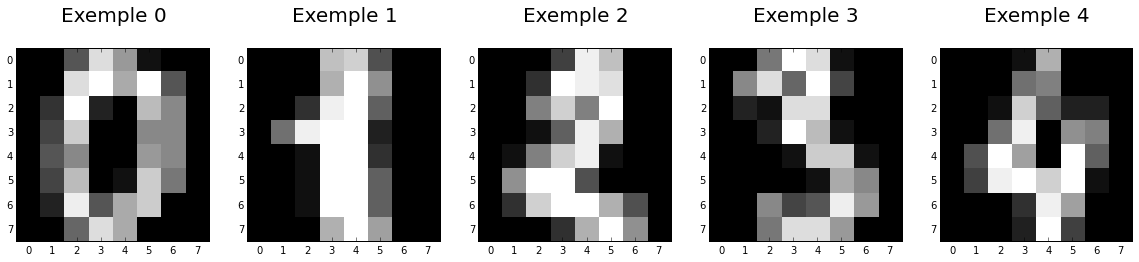

In [0]:
# Affichage de quelques exemples:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('Exemple %i\n' % label, fontsize = 20)

In [0]:
# Séparation des données en ensembles d'apprentissage (X_train, Y_train) 
#  et de test (X_test, Y_test)

test_size = 0.25 # proportion d'exemples utilisés pour le test
i = int(X.shape[0] * (1-test_size))

X_train = X[:i]
Y_train = Y[:i]
X_test = X[i:]
Y_test = Y[i:]
print( i, 'exemples en apprentissage et', len(Y_test), 'en test.')

# Ici on prend juste le début, la fonction sklearn.model_selection.train_test_split
# est plus intéressante (on la verra plus tard)


1347 exemples en apprentissage et 450 en test.


In [0]:
# Le modèle:
K = 3

model = KNeighborsClassifier(n_neighbors=K)

# Apprentissage:
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [0]:
# Test du modèle
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print('10 premiers exemples de test:')
print('Classes vraies :', Y_test[:12])
print('Classes prévues:', Y_test_pred[:12])

# Calcul du taux d'erreur
from sklearn import metrics
print("Précision:",metrics.accuracy_score(Y_test, Y_test_pred))

10 premiers exemples de test:
Classes vraies : [3 7 3 3 4 6 6 6 4 9 1 5]
Classes prévues: [3 7 3 3 4 6 6 6 4 9 1 5]
Précision: 0.971111111111


In [0]:
errors = np.where( Y_test != Y_test_pred )[0]
print('Erreurs sur l\'ensemble de test:', errors)
nb_err = len(errors)
accuracy = (len(Y_test) - nb_err)/len(Y_test)
print('Nombre d\'erreurs:', nb_err, 'Précision', 100*accuracy, '%')

Erreurs sur l'ensemble de test: [ 14 206 235 258 259 264 281 311 313 315 380 418 443]
Nombre d'erreurs: 13 Précision 97.11111111111111 %


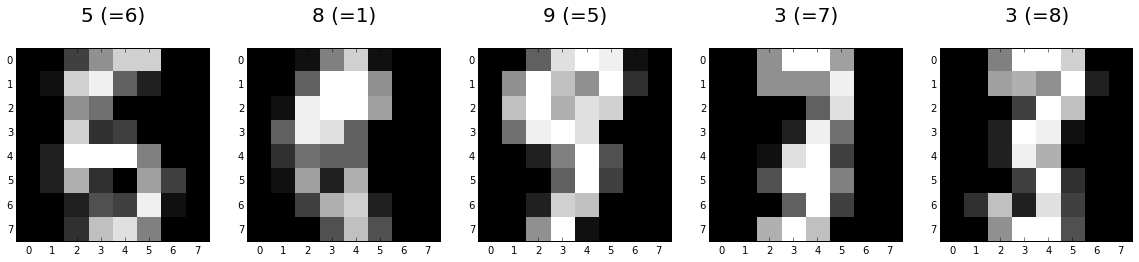

In [0]:
# Affiche les 5 premières erreurs:
plt.figure(figsize=(20,4))
i = 1
for index in errors[:5]:
    img = X_test[index]
    label = Y_test[index]
    plt.subplot(1, 5, i)
    plt.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('%d (=%d)\n' % (label, Y_test_pred[index]), fontsize = 20)
    i += 1

In [0]:
# Erreur en fonction de k

# A vous de jouer !


k= 1 err=3.8%
k= 2 err=3.8%
k= 3 err=2.9%
k= 4 err=3.1%
k= 5 err=3.6%
k= 6 err=4.2%
k= 7 err=4.4%
k= 8 err=4.4%


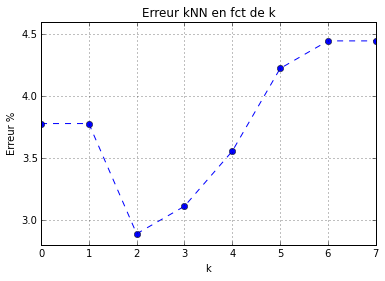